## Sphericity (ranging from 0 to 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
sns.set()

In [2]:
df = pd.read_csv('C:/Users/hamro/Desktop/vestonice_venus_research-master/data/final_table.csv', index_col=None)


In [3]:
df.head()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea (mm^2),Sphericity
0,91.7529,-1249.26,-1243.58,-1685.28,0.545994,0.731435,0.620706,244.7360,0.401975
1,33.2852,-1241.94,-1257.46,-1686.12,0.946436,0.566783,0.094506,175.0780,0.285816
2,26.8576,-1246.98,-1235.86,-1648.17,0.862477,0.343091,0.400835,194.9460,0.222475
3,20.5755,-1249.24,-1250.28,-1680.69,0.844642,0.736602,0.210912,94.2789,0.385156
4,17.9376,-1242.87,-1249.47,-1647.25,0.710594,0.471159,0.614242,71.3098,0.464705


In [4]:
df.shape

(92320, 9)

### for calculating sphericity the below formula was used
### where Vp - is the volume of particle and Ap - is the area of particle
### viz: https://sciencing.com/calculate-sphericity-5143572.html

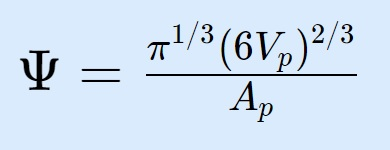

In [5]:
def sphericity(volume, surface_area):
    """
    function for calculation sphericity based on the volume and the area of particles
    """
    return ((math.pi**(1./3.))*((6*volume)**(2./3.)))/surface_area

### changing unit for voxel area

In [6]:
df['Sphericity'] = df.apply(lambda x: sphericity(x['Volume3d (mm^3) '], x['VoxelFaceArea (mm^2)']), axis=1)

### sphericity particles greater than or equal 2mm^3
### for this category of particles sphericity ranges from 0.22 to 0.55

In [7]:
sphericity_over_2 = df[df['Volume3d (mm^3) '] > 2]

In [8]:
sphericity_over_2.describe()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea (mm^2),Sphericity
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,7.194427,-1246.532464,-1247.985072,-1673.264203,0.749591,0.522337,0.490613,43.186864,0.399711
std,11.879673,5.010710,8.228589,25.167699,0.138979,0.190592,0.223466,40.252915,0.082241
min,2.057330,-1260.040000,-1263.090000,-1720.930000,0.373645,0.141648,0.094506,15.814000,0.222475
25%,2.649340,-1249.400000,-1254.750000,-1692.350000,0.659225,0.399644,0.304423,22.947400,0.334487
50%,3.763380,-1246.280000,-1247.770000,-1669.500000,0.762504,0.492984,0.491434,29.387900,0.406799
75%,7.212370,-1242.330000,-1242.440000,-1655.430000,0.860182,0.672624,0.626743,44.775600,0.464705
max,91.752900,-1236.340000,-1229.200000,-1619.440000,0.966510,0.917335,0.959761,244.736000,0.557364


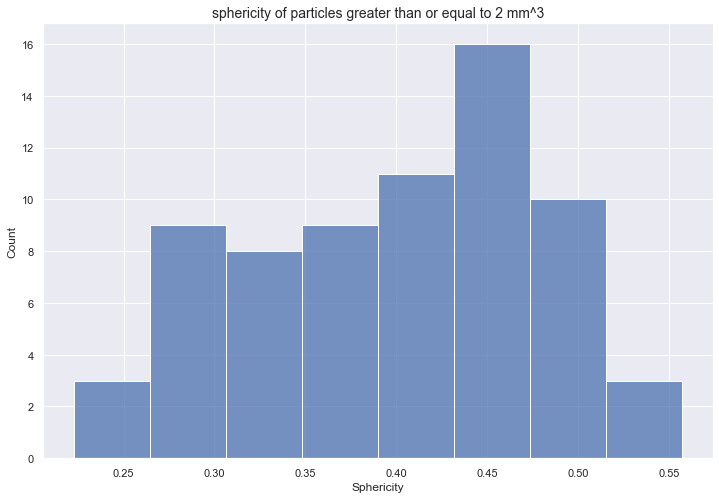

In [9]:
fig = plt.figure(figsize=(12,8))
sns.histplot(sphericity_over_2['Sphericity'])
plt.title("sphericity of particles greater than or equal to 2 mm^3", {'size':14})
plt.show()

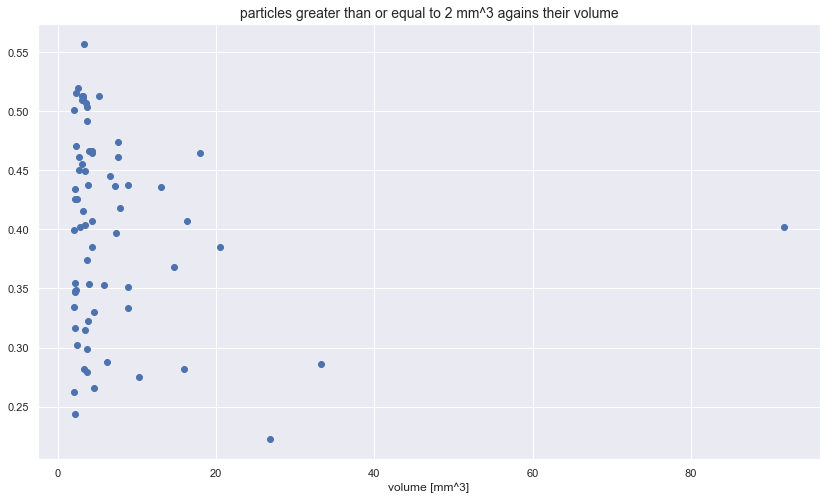

In [10]:
fig = plt.figure(figsize=(14,8))
plt.scatter(sphericity_over_2['Volume3d (mm^3) '], sphericity_over_2['Sphericity'])
plt.title("particles greater than or equal to 2 mm^3 agains their volume", {'size':14})
plt.xlabel("volume [mm^3]" ,{'size':12})
plt.show()

### as we can see below there is not strong correlation between sphericity and the coordinates of the particals

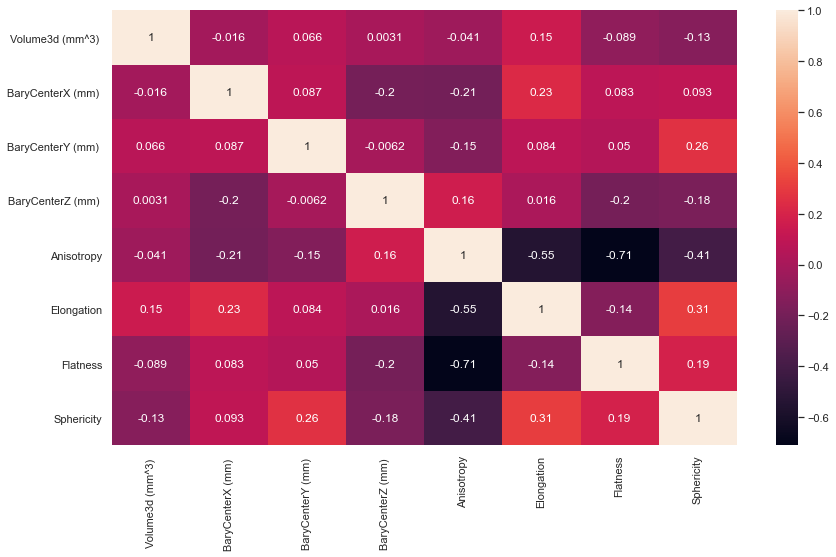

In [11]:
fig = plt.figure(figsize=(14,8))
corrMatrix = sphericity_over_2[['Volume3d (mm^3) ', 'BaryCenterX (mm) ', 'BaryCenterY (mm) ',
       'BaryCenterZ (mm) ', 'Anisotropy', 'Elongation', 'Flatness',
       'Sphericity']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### sphericity of particles under 2 mm^3

In [12]:
sphericity_under_2 = df[df['Volume3d (mm^3) '] <= 2]

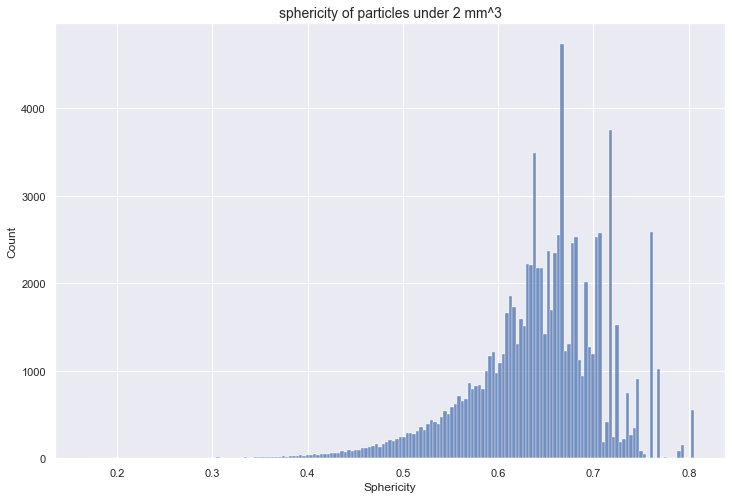

In [13]:
fig = plt.figure(figsize=(12,8))
sns.histplot(sphericity_under_2['Sphericity'])
plt.title("sphericity of particles under 2 mm^3", {'size':14})
plt.show()

### all particles with sphericity over 0.7 do not exceed the volume of 0.002 mm^3

In [14]:
sphericity_under_2[sphericity_under_2['Sphericity'] > 0.7].describe()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea (mm^2),Sphericity
count,18907.000000,18907.000000,18907.000000,18907.000000,18907.000000,1.890700e+04,18907.000000,18907.000000,18907.000000
mean,0.000084,-1246.612004,-1246.946546,-1671.298873,0.776902,5.399209e-01,0.430599,0.011371,0.730274
std,0.000118,4.624897,7.702616,25.633582,0.207431,2.679375e-01,0.326883,0.009065,0.026131
min,0.000014,-1261.650000,-1268.540000,-1731.770000,0.000357,5.718720e-21,0.000000,0.003584,0.700031
25%,0.000027,-1249.780000,-1252.520000,-1690.160000,0.640858,3.080590e-01,0.092223,0.005735,0.707040
50%,0.000041,-1246.570000,-1246.970000,-1670.520000,0.815666,4.998620e-01,0.440669,0.007886,0.718528
75%,0.000095,-1243.220000,-1241.445000,-1652.660000,0.969419,7.502070e-01,0.700341,0.014338,0.748229
max,0.002233,-1233.630000,-1225.980000,-1617.670000,1.000000,9.999770e-01,1.000000,0.117572,0.805996


### practically no correlation between sphericity and particle coordinates

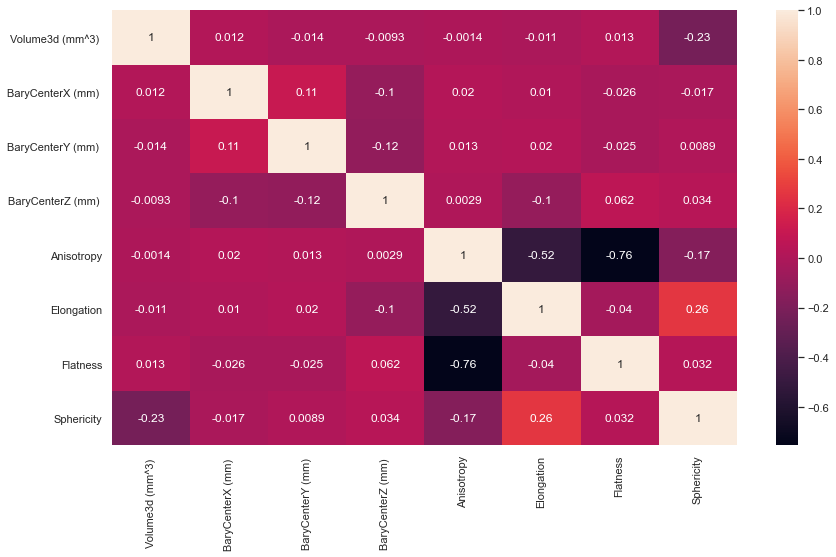

In [15]:
fig = plt.figure(figsize=(14,8))
corrMatrix = sphericity_under_2[['Volume3d (mm^3) ', 'BaryCenterX (mm) ', 'BaryCenterY (mm) ',
       'BaryCenterZ (mm) ', 'Anisotropy', 'Elongation', 'Flatness',
       'Sphericity']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()